In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bm_train = pd.read_csv('bigmart_train.csv')
df_bm_test = pd.read_csv('bigmart_train.csv')

In [3]:
df_bm_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df_bm_train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [5]:
df_bm_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_bm_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
df_bm_train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [8]:
df_bm_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df_bm_train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
df_bm_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [11]:
df_bm_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [12]:
df_bm_train.shape

(8523, 12)

In [13]:
df_mdeian_item_weight = df_bm_train.groupby(['Item_Type'])[['Item_Weight']].mean().reset_index()
df_mdeian_item_weight.rename(columns ={'Item_Weight':'Avg_Item_Weight'},inplace=True)
df_mdeian_item_weight

,Item_Type,Avg_Item_Weight
0,Baking Goods,12.277108
1,Breads,11.346936
2,Breakfast,12.768202
3,Canned,12.305705
4,Dairy,13.426069
5,Frozen Foods,12.867061
6,Fruits and Vegetables,13.224769
7,Hard Drinks,11.400328
8,Health and Hygiene,13.142314
9,Household,13.384736


In [14]:
df_bm_train = pd.merge(left=df_bm_train, right=df_mdeian_item_weight,on=['Item_Type'], how='left')

In [15]:
df_bm_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Avg_Item_Weight
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.426069
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.847460
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.817344
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,13.224769
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,13.384736
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,12.277108
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,12.987880
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.987880
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,12.867061
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,12.867061


In [16]:
df_bm_train['Item_Weight'] = df_bm_train.apply(lambda x: x[12] if pd.isna(x[1]) else x[1], axis=1)

In [17]:
df_bm_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Avg_Item_Weight                 0
dtype: int64

In [18]:
df_bm_train['Outlet_Size'] = df_bm_train['Outlet_Size'].fillna('Medium')

In [19]:
df_bm_train['Outlet_Size'].isnull().sum()

0

In [20]:
df_bm_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
df_bm_train['Item_Fat_Content'] = df_bm_train['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                                                        'Regular':'Regular',
                                                                        'low fat':'Low Fat',
                                                                        'LF':'Low Fat',
                                                                        'reg': 'Regular'})

In [22]:
df_bm_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [23]:
df_bm_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Avg_Item_Weight              0
dtype: int64

In [24]:
df_bm_train.shape

(8523, 13)

In [25]:
df_bm_train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


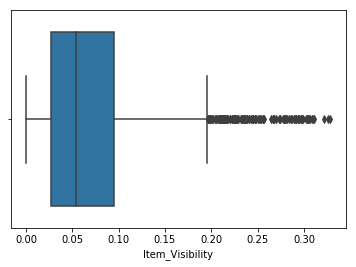

In [27]:
sns.boxplot(df_bm_train['Item_Visibility'])

In [28]:
Q1 = df_bm_train['Item_Visibility'].quantile(0.25)
Q3 = df_bm_train['Item_Visibility'].quantile(0.75)

IQR = Q3-Q1
IQR

0.067595815

In [29]:
filt_train = df_bm_train.query('(@Q1-1.5*@IQR) <=Item_Visibility <=(@Q3 + 1.5*@IQR)')
filt_train.shape

(8379, 13)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


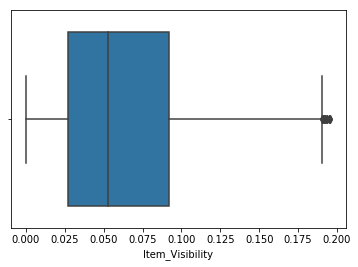

In [30]:
sns.boxplot(filt_train['Item_Visibility'])
plt.show()

In [31]:
df_bm_train=filt_train
df_bm_train.shape

(8379, 13)

In [32]:
df_bm_train['Item_Visibility_bins'] = pd.cut(df_bm_train['Item_Visibility'],[0.000,0.065,0.13,0.2],
                                            labels = ['Low Viz','Viz','High Viz'])

In [33]:
df_bm_train.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Avg_Item_Weight                0
Item_Visibility_bins         526
dtype: int64

In [34]:
df_bm_train['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [35]:
df_bm_train['Item_Visibility_bins']=df_bm_train['Item_Visibility_bins'].replace(np.nan,'Low Viz', regex=True)

In [36]:
df_bm_train['Item_Visibility_bins'].isnull().sum()

0

In [37]:
df_bm_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Avg_Item_Weight              0
Item_Visibility_bins         0
dtype: int64

In [38]:
df_bm_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Avg_Item_Weight,Item_Visibility_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.426069,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.847460,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.817344,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,13.224769,Low Viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,13.384736,Low Viz


In [39]:
df_bm_train.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8379,8379,8379,8379,8379,8379,8379
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5432,1208,935,5136,3283,5577


In [40]:
df_bm_train['Outlet_Location_Type'].value_counts()

Tier 3    3283
Tier 2    2785
Tier 1    2311
Name: Outlet_Location_Type, dtype: int64

In [41]:
df_bm_train['Outlet_Size'].value_counts()

Medium    5136
Small     2311
High       932
Name: Outlet_Size, dtype: int64

In [42]:
df_bm_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store         939
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [43]:
df_bm_train['Item_Type'].value_counts()

Fruits and Vegetables    1208
Snack Foods              1181
Household                 897
Frozen Foods              845
Dairy                     670
Canned                    638
Baking Goods              631
Health and Hygiene        516
Soft Drinks               439
Meat                      418
Breads                    248
Hard Drinks               211
Others                    167
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

In [44]:
df_bm_train['Outlet_Age'] = df_bm_train['Outlet_Establishment_Year'].apply(lambda x : 2021-x)

In [45]:
df_bm_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Avg_Item_Weight,Item_Visibility_bins,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.426069,Low Viz,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.847460,Low Viz,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.817344,Low Viz,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,13.224769,Low Viz,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,13.384736,Low Viz,34


In [46]:
df_bm_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Avg_Item_Weight',
       'Item_Visibility_bins', 'Outlet_Age'],
      dtype='object')

In [47]:
    df_bm_train.drop(['Item_Identifier','Outlet_Identifier','Avg_Item_Weight','Outlet_Establishment_Year'],
                 axis=1, inplace=True)

In [48]:
df_bm_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_bins,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Low Viz,22
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Low Viz,12
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Low Viz,22
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,Low Viz,23
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,Low Viz,34


In [49]:
df_bm_train['Item_Visibility_bins'].unique()

[Low Viz, Viz, High Viz]
Categories (3, object): [Low Viz < Viz < High Viz]

In [50]:
df_bm_train=pd.get_dummies(columns=['Item_Visibility_bins'], data = df_bm_train )

In [51]:
df_bm_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
0,9.300000,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22,1,0,0
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12,1,0,0
2,17.500000,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22,1,0,0
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,23,1,0,0
4,8.930000,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,34,1,0,0
5,10.395000,Regular,0.000000,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,556.6088,12,1,0,0
6,13.650000,Regular,0.012741,Snack Foods,57.6588,High,Tier 3,Supermarket Type1,343.5528,34,1,0,0
7,12.987880,Low Fat,0.127470,Snack Foods,107.7622,Medium,Tier 3,Supermarket Type3,4022.7636,36,0,1,0
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,Medium,Tier 2,Supermarket Type1,1076.5986,19,1,0,0
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,Medium,Tier 2,Supermarket Type1,4710.5350,14,0,1,0


In [52]:
df_bm_train = pd.get_dummies(columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type',
                                    'Outlet_Type'], data=df_bm_train)

In [53]:
#df_bm_train.shape

In [54]:
df_bm_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,22,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,12,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,22,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,23,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,34,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [55]:
X_train = df_bm_train.drop(['Item_Outlet_Sales'], axis=1)
y_train = df_bm_train['Item_Outlet_Sales']

In [56]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,22,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,12,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,22,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,23,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,34,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
BigMart_model = LinearRegression()

In [59]:
BigMart_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
y_train_pred = BigMart_model.predict(X_train)

In [61]:
r2_score(y_pred=y_train_pred, y_true = y_train)

0.5589567049464941

In [62]:
np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true = y_train))

1131.2848463032558

In [63]:
df_bm_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
df_bm_test.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [65]:
df_bm_test.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

In [66]:
df_bm_test.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [67]:
df_bm_test_Item_Weight_median = df_bm_test.groupby(['Item_Type'])[['Item_Weight']].median().reset_index()
df_bm_test_Item_Weight_median.rename(columns={'Item_Weight':'Avg_Item_Weight'},inplace=True)
df_bm_test_Item_Weight_median

,Item_Type,Avg_Item_Weight
0,Baking Goods,11.650
1,Breads,10.600
2,Breakfast,10.695
3,Canned,12.150
4,Dairy,13.350
5,Frozen Foods,12.850
6,Fruits and Vegetables,13.100
7,Hard Drinks,10.100
8,Health and Hygiene,12.150
9,Household,13.150


In [68]:
df_bm_test = pd.merge(left=df_bm_test, right=df_bm_test_Item_Weight_median, on=['Item_Type'], how='left')
df_bm_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Avg_Item_Weight
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.35
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.80
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.35
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,13.10
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,13.15


In [69]:
df_bm_test['Item_Weight']=df_bm_test.apply(lambda x: x[10] if pd.isna(x[0]) else x[0], axis=1)

In [70]:
df_bm_test.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Avg_Item_Weight                 0
dtype: int64

In [71]:
df_bm_test['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [72]:
df_bm_test['Outlet_Size'] =df_bm_test['Outlet_Size'].fillna('Medium')

In [73]:
df_bm_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Avg_Item_Weight              0
dtype: int64

In [74]:
df_bm_test['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


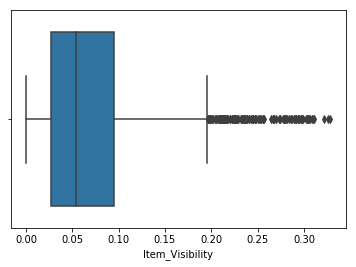

In [76]:
sns.boxplot(df_bm_test['Item_Visibility'])
plt.show()

In [77]:
Q1 = df_bm_test['Item_Visibility'].quantile(0.25)

In [78]:
Q1

0.026989477499999998

In [79]:
Q3 = df_bm_test['Item_Visibility'].quantile(0.75)
Q3

0.0945852925

In [80]:
IQR = Q3 - Q1
IQR

0.067595815

In [81]:
filt_df_bm_test = df_bm_test.query('(@Q1-1.5*@IQR) <=Item_Visibility <=(@Q1 +1.5*@IQR)')
filt_df_bm_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Avg_Item_Weight
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.350
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.800
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.350
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,13.100
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,13.150
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088,11.650
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528,13.150
7,13.150,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636,13.150
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,Medium,Tier 2,Supermarket Type1,1076.5986,12.850
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,Medium,Tier 2,Supermarket Type1,4710.5350,12.850


In [82]:
filt_df_bm_test.shape

(7434, 11)

In [83]:
df_bm_test.shape

(8523, 11)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


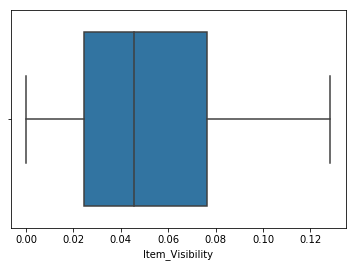

In [84]:
sns.boxplot(filt_df_bm_test['Item_Visibility'])

In [85]:
df_bm_test =filt_df_bm_test


In [86]:
df_bm_test.shape

(7434, 11)

In [87]:
df_bm_test['Item_Visibility_bins'] = pd.cut(df_bm_test['Item_Visibility'],[0.000,0.065,0.13,0.2],
                                            labels = ['Low Viz','Viz','High Viz'])

In [88]:
df_bm_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Avg_Item_Weight,Item_Visibility_bins
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.35,Low Viz
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.80,Low Viz
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.35,Low Viz
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,13.10,NaN
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,13.15,NaN


In [89]:
df_bm_test['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2505
High Viz       0
Name: Item_Visibility_bins, dtype: int64

In [90]:
df_bm_test['Item_Visibility_bins'] = df_bm_test['Item_Visibility_bins'].replace(np.nan,'Low Viz', regex=True)

In [91]:
df_bm_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Avg_Item_Weight              0
Item_Visibility_bins         0
dtype: int64

In [92]:
df_bm_test['Outlet_Age'] = df_bm_test['Outlet_Establishment_Year'].apply(lambda x : 2021-x)

In [93]:
df_bm_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Avg_Item_Weight,Item_Visibility_bins,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.35,Low Viz,22
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.80,Low Viz,12
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.35,Low Viz,22
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,13.10,Low Viz,23
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,13.15,Low Viz,34


In [115]:
df_bm_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [116]:
df_bm_test['Item_Fat_Content'] = df_bm_test['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                                                        'Regular':'Regular',
                                                                        'low fat':'Low Fat',
                                                                        'LF':'Low Fat',
                                                                        'reg': 'Regular'})

In [117]:
df_bm_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [118]:
df_bm_test.drop(['Outlet_Establishment_Year','Avg_Item_Weight'], axis=1, inplace=True)

In [119]:
df_bm_test= pd.get_dummies(columns=['Item_Visibility_bins'], data = df_bm_test )

In [120]:
df_bm_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22,1,0,0
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12,1,0,0
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22,1,0,0
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,23,1,0,0
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,34,1,0,0


In [121]:
df_bm_test= pd.get_dummies(columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'], data = df_bm_test )

In [122]:
df_bm_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,22,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,12,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,22,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,23,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,34,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [123]:
X_test = df_bm_test.drop(['Item_Outlet_Sales'], axis=1)

In [124]:
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,22,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,12,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,22,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,23,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,34,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [125]:
y_test=df_bm_test.Item_Outlet_Sales

In [126]:
X_train.shape

(8379, 35)

In [127]:
X_test.shape

(7434, 35)

In [130]:
y_test_pred=BigMart_model.predict(X_test)

In [131]:
r2_score(y_pred=y_test_pred, y_true=y_test)

0.5527450279213317

In [132]:
np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test))

1142.8303787120906

In [134]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=42)

In [137]:
lin = LinearRegression()

In [138]:
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
print(lin.coef_)
print(lin.intercept_)

[ 3.23308366e+00 -1.40394770e+03  1.59508760e+01 -4.93726885e+01
 -8.85854523e+01  1.95619385e+01  6.90235138e+01 -1.07502475e+01
  1.07502475e+01 -4.22655211e+01 -7.64741048e+01 -5.99669872e+00
  1.80686284e+01 -2.85622064e+01 -8.76938860e+00  5.29735704e+00
 -1.25843188e+02  9.16610097e+00 -3.60117675e+01 -1.80900816e+01
 -1.35184760e+01  3.01632575e+02  1.03070675e+01  2.76906796e+01
 -1.66309763e+01  7.40311049e+02 -4.13999082e+02 -3.26311966e+02
  2.88074042e+02  1.02045390e+00 -2.89094496e+02 -1.63621797e+03
 -2.69932153e+02 -5.02273258e+02  2.40842338e+03]
1653.6487344957704


In [140]:
predictions = lin.predict(X_test)


In [142]:
r2_score(predictions,y_test)

0.2441219150658056

In [143]:
np.sqrt(mean_squared_error(predictions,y_test))

1120.5695785722644

In [144]:
from sklearn.linear_model import Ridge

In [148]:
ridgereg = Ridge(alpha=0.001, normalize=True)
ridgereg.fit(X_train, y_train)

pred_train= ridgereg.predict(X_train)
pred_test= ridgereg.predict(X_test)
print(np.sqrt(mean_squared_error(pred_train,y_train)))
print(np.sqrt(mean_squared_error(pred_test,y_test)))
ridgereg.score(X_test,y_test)

1137.1641121626947
1120.3043337328156


0.5470885186211272

In [150]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)

pred_train= lassoreg.predict(X_train)
pred_test= lassoreg.predict(X_test)
print(np.sqrt(mean_squared_error(pred_train,y_train)))
print(np.sqrt(mean_squared_error(pred_test,y_test)))
lassoreg.score(X_test,y_test)


1137.136407879926
1120.49487281129


0.5469344449960747

In [151]:
from sklearn.linear_model import ElasticNet

elas = ElasticNet(alpha=0.001, normalize=True)

elas.fit(X_train, y_train)

pred_train= elas.predict(X_train)
pred_test= elas.predict(X_test)
print(np.sqrt(mean_squared_error(pred_train,y_train)))
print(np.sqrt(mean_squared_error(pred_test,y_test)))
elas.score(X_test,y_test)

1474.796426554124
1425.953707103541


0.2662431790118652